In [1]:
import sys
import os
sys.path.insert(0, "../../python")

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.style.use('notes')
import beam.calc.electron as ecalc
from lens import profile
from scipy.optimize import minimize
import scipy.constants as const
me = const.physical_constants['electron mass energy equivalent in MeV'][0]

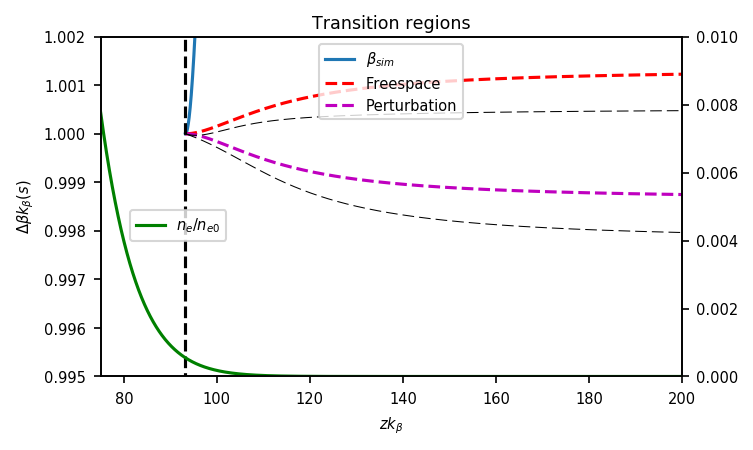

In [17]:
N = 3500
beta0 = 1
alpha0 = 0
gb0 = 20000
ne0 = 2*gb0/5.95074e4**2
dgdz0 = 0.0
a = 24.062976
z = np.linspace(0, 200, N)
frac = np.exp(-z**2/(2*a**2))
ne = frac*ne0
beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)

cutoff = .85
sel = -np.array(alpha)>cutoff

zTran = z[-np.array(alpha)>cutoff]
fracTran = frac[-np.array(alpha)>cutoff]
neTran = np.zeros(len(zTran))
tran1 = z[sel][0]
betaTran = np.array(beta)[sel][0]
alphaTran = np.array(alpha)[sel][0]
zint = zTran-zTran[0]
dz = zint[1]-zint[0]
I0 = np.cumsum(fracTran)*dz
I1 = np.cumsum(zint*fracTran)*dz
I2 = np.cumsum(zint*zint*fracTran)*dz
gammaTran = (1+alphaTran**2)/betaTran
betas = 1/(gammaTran+2*(alphaTran*I0[-1]-gammaTran*I1[-1]))
M11 = 1-I0*zint+I1
M12 = zint-I1*zint+I2
betaPer = M11**2*betaTran - 2*M11*M12*alphaTran + M12**2*gammaTran

I01 = I0*1.01
I11 = I1*1.01
I21 = I2*1.01
M111 = 1-I01*zint+I11
M121 = zint-I11*zint+I21
betaPer1 = M111**2*betaTran - 2*M111*M121*alphaTran + M121**2*gammaTran

I0n1 = I0*0.99
I1n1 = I1*0.99
I2n1 = I2*0.99
M11n1 = 1-I0n1*zint+I1n1
M12n1 = zint-I1n1*zint+I2n1
betaPern1 = M11n1**2*betaTran - 2*M11n1*M12n1*alphaTran + M12n1**2*gammaTran


beta2, alpha2, gamma2, gb2 = ecalc.cs_propagation(zTran, neTran, betaTran, alphaTran, gb0, dgdz0, ne0)
beta1, alpha1, gamma1, gb1 = ecalc.cs_propagation(zTran, fracTran*ne0, betaTran, alphaTran, gb0*1.01, dgdz0, ne0)
betan1, alphan1, gamman1, gbn1 = ecalc.cs_propagation(zTran, fracTran*ne0, betaTran, alphaTran, gb0*0.99, dgdz0, ne0)

plt.figure(figsize=(5, 3), dpi=150)
plt.plot(zTran, beta2/np.array(beta)[sel])
plt.plot(zTran, beta1/np.array(beta)[sel], 'r--')
plt.plot(zTran, betan1/np.array(beta)[sel], 'm--')
plt.plot([tran1, tran1], [-1, 2], 'k--')
plt.plot(zTran, betaPer1/np.array(beta)[sel], 'k--', linewidth=0.5)
plt.plot(zTran, betaPern1/np.array(beta)[sel], 'k--', linewidth=0.5)
plt.title(r'Transition regions')
plt.xlabel(r'$z k_\beta$')
plt.ylabel(r'$\Delta\beta k_\beta(s)$')
plt.legend([r'$\beta_{sim}$', 'Freespace', 'Perturbation'], loc=9)
plt.ylim(.995, 1.002)
plt.twinx()
plt.plot(z, frac, 'g')
#plt.text(150, 0.1, r'$\frac{n_e}{n_{e0}}=e^{-z^2/2a^2}$', color='green', fontsize=10)
#plt.plot(z, z*np.exp(z**2/(4*a**2))/a**2, 'c')
#plt.yscale('log')
plt.ylim(0, 0.01)
plt.xlim(75, 200)
plt.legend([r'$n_{e}/n_{e0}$', 'A'], loc=(0.05, .4))
plt.show()